In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import seaborn as sns
from IPython.display import display
import scipy.optimize as so

Text(8.5, 0.15, '$\\mu_Y=5, \\sigma_Y^2=5$')

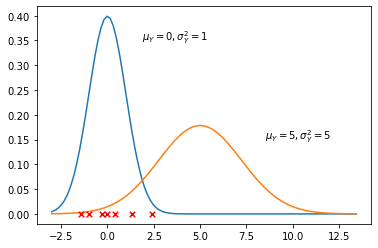

In [2]:
#plot some points
points = [-1.4,-1,-.3,0,0.4,1.3,2.4]
zeros = np.zeros(len(points))
plt.scatter(points, zeros, marker='x', color='red',zorder=20, s=30,clip_on=False)

#first normal distribution
mu = 0
variance = 1
sigma = math.sqrt(variance)

#second normal distribution
mu2=5
variance2=5
sigma2 = math.sqrt(variance2)

#plot these distributions on same plot
x = np.linspace(mu - 3*sigma, mu + 6*sigma2, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(x, stats.norm.pdf(x, mu2, sigma2))
plt.annotate(r'$\mu_Y=0, \sigma_Y^2=1$', xy=(1.85,.35))
plt.annotate(r'$\mu_Y=5, \sigma_Y^2=5$', xy=(8.5,.15))

Text(8.5, 0.1, 'log likelihood = -29.231602425952058')

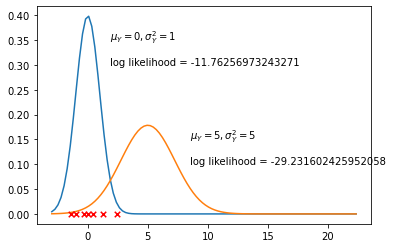

In [3]:
#plot some points
points = [-1.4,-1,-.3,0,0.4,1.3,2.4]
zeros = np.zeros(len(points))
plt.scatter(points, zeros, marker='x', color='red',zorder=20, s=30,clip_on=False)

#first normal distribution
mu = 0
variance = 1
sigma = math.sqrt(variance)

#second normal distribution
mu2=5
variance2=5
sigma2 = math.sqrt(variance2)

#plot the distributions with the points, add log likelihood
x = np.linspace(mu - 3*sigma, mu + 10*sigma2, 100)
a = np.log(stats.norm.pdf(points,mu,sigma)).sum()
b = np.log(stats.norm.pdf(points,mu2,sigma2)).sum()
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(x, stats.norm.pdf(x, mu2, sigma2))
plt.annotate(r'$\mu_Y=0, \sigma_Y^2=1$', xy=(1.85,.35))
plt.annotate(r'log likelihood = ' + str(a), xy=(1.85,.3))
plt.annotate(r'$\mu_Y=5, \sigma_Y^2=5$', xy=(8.5,.15))
plt.annotate(r'log likelihood = ' + str(b), xy=(8.5,.1))

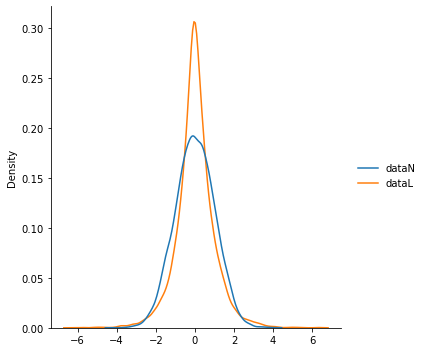

In [4]:
#First, let's generate some data
n = 10001

#Note: variance of normal distribution is 1
normalData = pd.DataFrame({"dataN": pd.Series(np.random.normal(0,1,n))})
#Note: 1/sqrt(2) gives the laplace the same variance as normal distribution 
laplaceData = pd.DataFrame({"dataL": pd.Series(np.random.laplace(0,1/np.sqrt(2),n))})

#put into a single df
df = pd.concat([normalData,laplaceData])#.fillna(0)
#display(df)

#Plot the distributions on top of each other
sns.displot(data=df.loc[:,["dataN","dataL"]],kind="kde")

(0.0, 0.1)

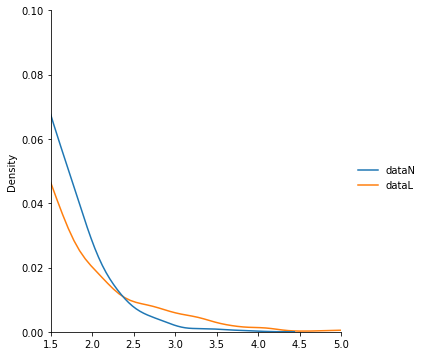

In [5]:
# A closer look...
sns.displot(data=df.loc[:,["dataN","dataL"]],kind="kde")
plt.xlim(1.5,5)
plt.ylim(0,0.1)

#Notice: the Laplace distribution has larger density at the extremes 

In [6]:
#Laplace Neg Log Likelihood (want to minimize negative --> max log likelihood)
def laplaceNegLogLikelihood(mu,b,y):
    #https://en.wikipedia.org/wiki/Laplace_distribution
    nll = -np.sum(-np.log(2*b) - abs(y - mu) / b)
    return nll

In [7]:
#Max Likelihood Estimate for mu
def maximumLikelihood(y):
    mu_init = 0; b_init = 1
    RES = so.minimize(laplaceNegLogLikelihood, mu_init, args=(b_init, y), method="Powell", tol = 1e-8)
    return RES.x

display(maximumLikelihood(laplaceData.values))

array([9.9191902e-05])

In [8]:
# Is the answer the same as the median? 
display(laplaceData.median())
#Recall that minimizing sum of abs diffs ~ median

dataL    0.000099
dtype: float64

In [9]:
# Laplace Negative Log Likelihood Regression
def laplaceRegNegLogLikelihood(b, X, y):
    mu = np.dot(X,b).reshape(-1,1)
    return laplaceNegLogLikelihood(mu, 1, y)

In [10]:
#import our dataset
df_run = pd.read_csv("runningSpeeds.csv")

In [18]:
# Function to maximize regression log likelihood
def maximumRegLikelihood(X, y, negloglik=laplaceRegNegLogLikelihood):
    nrows,ncols = X.shape
    bpr=np.zeros((ncols,1))
    RES = so.minimize(negloglik, bpr, args=(X,y), method="Powell", tol=1e-8)
    return RES.x

age = df_run.age.values
X = np.c_[np.ones(age.size), age]
y = df_run.pace.values.reshape(-1,1)

b0,b1 = maximumRegLikelihood(X,y)
print("b0: ",b0," | b1: ",b1)

b0:  3.335217391304613  | b1:  0.03434782608694666
